# QDB Assignments

## 1. Day One: Time to equilibrium

>Plot  on the same graph all three values for each time point, with and without atropine.
Calculate the average and standard deviation of with and without Atropine for each time point, and plot on the same graph.
> Remember that standard deviation is given by
>    
>  \\[  s = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2} .\\]
>    
>Plot the specifically bound in pmol, average value, with error bars, against time. 


## 2. Day Two: IC<sub>50</sub>

>the calculation of the [atropine]
>the calculation of [protein]
>use the variables from the least squares fit of calculations to show on your graph bound QNB in pmol/mg protein.
>draw a horizontal and vertical line on your graph to show where you took the IC50 value.


## 3. Day Three: k<sub>D</sub>

>Plot Specific binding - pmol/mg proteins vs free ligand concentration. Use a linear least squares fit to calculate the non-specific binding. Give error bars for the specific binding. Fit with a Scatchard Plot and find initial values of Kd and Btot (also calculate standard deviation of Kd). Use Scatchard values as initial values in a non-linear least squares fit to the binding curve. Report Kd , Btot and their standard deviations. 

# Day One

### 1.1 Import raw CPM-BG data

### 1.2 calculate their mean and standard deviation

In [214]:
import numpy as np

# import

# data collection timestamps
time=[0, 10, 20, 30, 45, 60]

# without atropine - 3 sets for each timestamp
cpm_wot_atr_1=[3639, 1146, 3274, 4386, 3583, 3799] # set 1 (CPM-BG)
cpm_wot_atr_2=[3465, 3641, 3422, 4386, 3854, 4245] # set 2 (CPM-BG)
cpm_wot_atr_3=[3780, 3592, 4212, 4386, 3770, 3708] # set 3 (CPM-BG)

# with atropine - 3 sets for each timestamp
cpm_atr_1=[1448, 820, 821, 1525, 1335, 961] # set 1 (CPM-BG)
cpm_atr_2=[1147, 179, 690, 1044, 1314, 1278] # set 2 (CPM-BG)
cpm_atr_3=[1025, 1959, 393,1284, 1932, 918] # set 3 (CPM-BG)

# 1.2 Calculate mean and standard deviation for each column

mean_cpm_wot_atr = np.mean([cpm_wot_atr_1, cpm_wot_atr_2, cpm_wot_atr_3], axis=0) # mean CPM without atropine
std_cpm_wot_atr = np.std([cpm_wot_atr_1, cpm_wot_atr_2, cpm_wot_atr_3], axis=0) # std CPM without atropine

mean_cpm_atr = np.mean([cpm_atr_1, cpm_atr_2, cpm_atr_3], axis=0) # mean CPM with atropine
std_cpm_atr = np.std([cpm_atr_1, cpm_atr_2, cpm_atr_3], axis=0) # std CPM with atropine

### 1.3 Plot graphs

<ol>
    <li> Graph of all 6 CPM - BG values against time (3 values per time point for each experiment: with / without atropine)</li>
    <li> Graph of average and standard deviation of CPM - BG v.s. Time</li>
</ol>

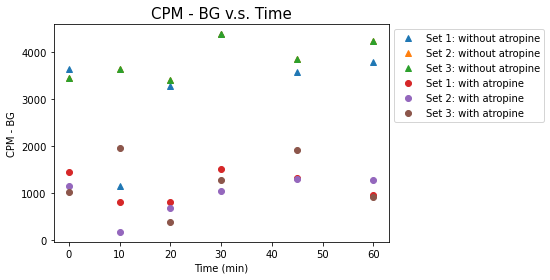

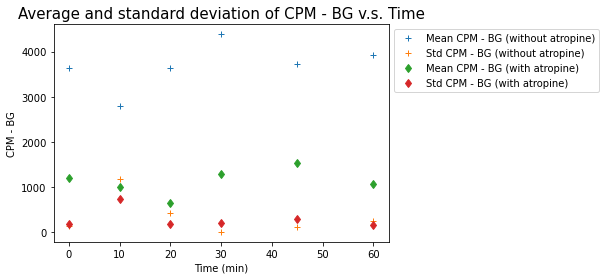

In [215]:
import matplotlib.pyplot as plt

%matplotlib inline

# the first plot: 6 CPM - BG values against time

plt.plot(time, cpm_wot_atr_1, "^", label="Set 1: without atropine")
plt.plot(time, cpm_wot_atr_2, "^", label="Set 2: without atropine")
plt.plot(time, cpm_wot_atr_2, "^", label="Set 3: without atropine")
plt.plot(time, cpm_atr_1, "o", label="Set 1: with atropine")
plt.plot(time, cpm_atr_2, "o", label="Set 2: with atropine")
plt.plot(time, cpm_atr_3, "o", label="Set 3: with atropine")
plt.xlabel("Time (min)")
plt.ylabel("CPM - BG") 
plt.title("CPM - BG v.s. Time", fontsize = 15)
plt.legend(bbox_to_anchor=(1, 1))
#plt.savefig('CPMvsTime.eps', format='eps', bbox_inches='tight')
plt.show()

# the second plot: Average and standard deviation of CPM - BG v.s. Time

plt.plot(time, mean_cpm_wot_atr, "+", label="Mean CPM - BG (without atropine)")
plt.plot(time, std_cpm_wot_atr, "+", label="Std CPM - BG (without atropine)")
plt.plot(time, mean_cpm_atr, "d", label="Mean CPM - BG (with atropine)")
plt.plot(time, std_cpm_atr, "d", label="Std CPM - BG (with atropine)")
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Time (min)")
plt.ylabel("CPM - BG")
plt.title("Average and standard deviation of CPM - BG v.s. Time", fontsize = 15)
#plt.savefig('AveStdCPMvsTime.eps', format='eps', bbox_inches='tight')
plt.show()


### 1.3 Plot graphs (cont.)

3 Plot specific binding against time.

> 1. Convert CPM-BG to bounds by the following equation:
>
> \\[ \text{Bound} = \frac{\text{CPM}}{\text{SPA * Counts Per Second * Efficiency}} \\]
>
> In the experiment setting, 
> <ol> <p> SPA = 1120 </p>
>    <p> Efficiency = 50% </p> 
>    <p> Counts Per Second (from CPM) = 60 </p>
> </ol>
>
> 2. Specific bounds can be computed by taking the difference between total_bounds (bounds_without_atropine) and free_bounds (bounds_with_atropine) i.e.
> 
> \\[ \text{Specific Bounds} = \text{Total bounds} - \text{Free bounds} \\]
>
> 3. Standard deviation of specific bound is obtained by taking square root of the sum of variances of total bounds and free bounds. It follows from the independence assumption between total and free bounds.
>
> \\[ \text{Std. Specific Bound} = \sqrt{\text{(Std. total bounds)}^2 + \text{(Std. free bounds)}^2} \\]
>
> 4. Plot the graph using specific bounds and time points and add error bars on them.

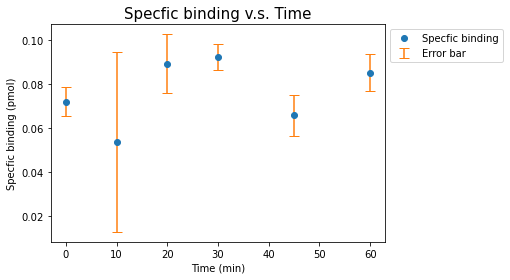

In [216]:
Eff =0.5   # Efficiency of counter
Cpm2cps=60 # Counts per min to counts per second
SPA=1120 # Specific activity in Vq/pmol

spec_bound = (mean_cpm_wot_atr - mean_cpm_atr)/SPA/Cpm2cps/Eff # compute specific bounds
spec_bound_std = np.sqrt(std_cpm_wot_atr**2 + std_cpm_atr**2) /SPA/Cpm2cps/Eff # compute std of specific bounds


# plot the graph

plt.plot(time, spec_bound, 'o', label="Specfic binding")
plt.errorbar(time, spec_bound,yerr=spec_bound_std, capsize=5, ls='none', label="Error bar") # add error bars
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Time (min)")
plt.ylabel("Specfic binding (pmol)")
plt.title("Specfic binding v.s. Time", fontsize = 15)
#plt.savefig('SpecvsTime.eps', format='eps', bbox_inches='tight')
plt.show()

# Day Two

### 2.1 Import raw CPM-BG data

Convert CPM-BG to bounds by the following equation:
>
> \\[ \text{Bound} = \frac{\text{CPM}}{\text{SPA} \times \text{Counts Per Second} \times \text{Efficiency}} \\]
>
> In the experiment setting, 
> <ol> <p> SPA = 1120 </p>
>    <p> Efficiency = 50% </p> 
>    <p> Counts Per Second (from CPM) = 60 </p>
> </ol>

In [217]:
A=[1457,1335,2437]
B=[2034,2594,4607]
C=[4838,3028,4715]
D=[7215,5200,2848]
E=[6053,5294,7166]
F=[7068,5318,7153]
G=[8569,8134,9501]

ave_count = np.mean([A,B,C,D,E,F,G], axis=1)

# parameters
Eff =0.5   # Efficiency of counter
Cpm2cps=60 # Counts per min to counts per second
SPA=1120 # Specific activity in Vq/pmol

# convert to pmol
bound = ave_count/SPA/Cpm2cps/Eff

### 2.2 calculate the [atropine] and [protein]

> The absorption of membrane in day 2 experiment is 0.496 which can be used to find the concentration of protein (BSA).
>
> Assume the relationship between absorption and protein concentration (BSA) is linear i.e.
>
> \\[ \text{Absorption} = \text{Grad} \times \text{protein concentration (BSA)} + \text{Intercept} \\]
>
> where Grad and Intercept are found by fitting a linear equaion over BSA test data

`protein concentration =  123.9353099303734`

In [218]:
# Fit linear model between absorption and BSA

!pip install lmfit
import lmfit 

BSA = [0, 50, 100, 150, 200] # BSA data
absorption = [0.005, 0.258, 0.405, 0.613, 0.755] # absorption data
model = lmfit.models.ExpressionModel("grad * x +intercept") # Defining equation to fit
params = model.make_params(grad=0.004, intercept =0) # Defining starting values

fit = model.fit(absorption, params, x=BSA) # fit linear model using lmfit
print(fit.fit_report()) # print out fitting report
concentration_protein = (0.496 - fit.params["intercept"].value) / fit.params["grad"].value # find the target protein concentration from the fitted line and given absorption
print(concentration_protein)

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 5
    # variables        = 2
    chi-square         = 0.00324630
    reduced chi-square = 0.00108210
    Akaike info crit   = -32.6983865
    Bayesian info crit = -33.4795107
[[Variables]]
    grad:       0.00371000 +/- 2.0805e-04 (5.61%) (init = 0.004)
    intercept:  0.03620000 +/- 0.02548058 (70.39%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(grad, intercept) = -0.816
123.9353099303734


## 2.3 plot the least squares fit model and show on the graph bound QNB

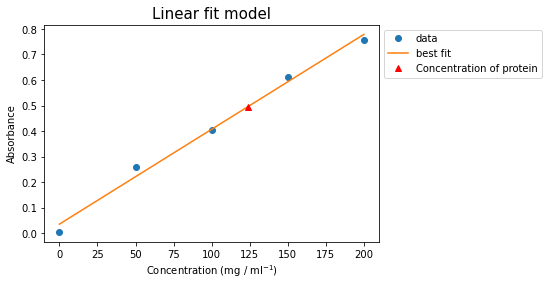

Best gradient  0.0037100000009716682 +/- 0.00020804805210400257
Best intercept  0.036200000037890666 +/- 0.025480579837840963


In [219]:
# plot the fitted model and target point

fit.plot_fit(xlabel='X',ylabel='Y')
plt.plot([concentration_protein], [0.496], "^r", label="Concentration of protein") # target point
plt.xlabel("Concentration (mg / ml$^{-1}$)")
plt.ylabel("Absorbance")
plt.title("Linear fit model", fontsize= 15)
plt.legend(bbox_to_anchor=(1, 1))  # Give box legend
#plt.savefig('AbsorbLinear.eps', format='eps', bbox_inches='tight')
plt.show()
print ("Best gradient ",fit.params["grad"].value,"+/-",fit.params["grad"].stderr)
print ("Best intercept ",fit.params["intercept"].value,"+/-",fit.params["intercept"].stderr)

## 2.4 Draw <sup>3</sup>H-QNB v.s. log<sub>10</sub> [atropine] curve and find IC<sub>50</sub> value

> <sup>3</sup>H-QNB can be calculated by the equation below.
>
> \\[ ^3\text{H-QNB} = \frac{\text{Bound}}{\text{Protein Amount}} \times 10^6 \\]
>
> where protein amount is 200 (volume of membrane added) multiplied by its concentration found in the previous step.
> 
> Note that the unit of <sup>3</sup>H-QNB is \\(pmol\cdot mg^{-1} \\) while units of bounds and protein amounts are \\(nmol\\) and \\(\mu g\\) separatedly. To make the unit consistent, a multiplier \\(10^6\\) needed to be added into the euqation above. 
>
> After plotting the graph <sup>3</sup>H-QNB v.s. log<sub>10</sub> [atropine], IC<sub>50</sub> is the x coordinate of the point whose y coordinate is the mean of the curve.

`IC50 = 0.001278164595333237`

IC50 0.001278164595333237


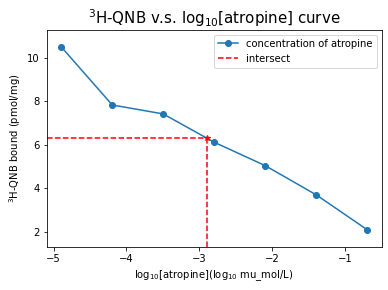

In [220]:

protein_amount = 200 * concentration_protein # total amount of protein
# QNB bound
QNB_bound = bound/protein_amount * 1e6 # convert to 3H-QNB bound

# plot

# atropine 
atropine = [None]*7
atropine[0] = 0.2

for i in range(1, 7):
    atropine[i] = atropine[i-1]/5  
    
plt.plot(np.log10(atropine), QNB_bound, "o-", label="concentration of atropine")
x_atropine = np.log10(atropine) # taking the log10 of atropine density
min_x = min(x_atropine)
max_x = max(x_atropine)
max_y = max(QNB_bound)
min_y = min(QNB_bound)
mean_y = (max_y + min_y)/2

# find the IC50 from the segment (x1, y1) - (x2, y2) containing mean y = 1/2 * (max(QNB_bound) + min(QNB_bound))
# initialize y1 = min(QNB_bound) and y2 = max(QNB_bound) 
# do an exhausted search over all data points to find the two closest to the mean y
# its x value is the IC_50 i.e. (IC_50, mean_y)

close_y_min = min(QNB_bound) 
close_y_max = max(QNB_bound)
for i in range(len(QNB_bound)):
    y_val = QNB_bound[i]
    if y_val > mean_y and y_val < close_y_max:
        close_y_max = y_val
        close_x_max = x_atropine[i]
    if y_val < mean_y and y_val > close_y_min:
        close_y_min = y_val
        close_x_min = x_atropine[i]

# get the equation for the segment
grad_2 = (close_y_max - close_y_min)/(close_x_max-close_x_min) # gradient
intercept_2 = close_y_max - grad_2 * close_x_max # intercept
intersect_x = (mean_y - intercept_2)/grad_2 # get IC50 value from the mean_y
print('IC50', 10**intersect_x)


# plot
plt.plot([min_x-0.2, intersect_x], [mean_y, mean_y], '--r', label="intersect")
plt.plot([intersect_x, intersect_x], [min_y-0.8, mean_y], '--r')

plt.plot([intersect_x], [mean_y], "*r", label="")
plt.xlim((min_x-0.2, max_x+0.2))
plt.ylim((min_y-0.8, max_y+0.8))

plt.xlabel("log$_{10}$[atropine](log$_{10}$ mu_mol/L)")
plt.ylabel("$^3$H-QNB bound (pmol/mg)")
plt.title("$^3$H-QNB v.s. log$_{10}$[atropine] curve", fontsize=15)
plt.legend(bbox_to_anchor=(1, 1))
#plt.savefig('IC50.eps', format='eps', bbox_inches='tight')
plt.show()

# Day Three

## 3.1 Import raw CPM-BG data

In [221]:
import numpy as np

%matplotlib inline

# raw CPM-BG data without atropine (8 triple sets)
A_without_atropine = [11906.50, 10766.50, 10942.50]
B_without_atropine = [7981.50, 5066.90, 8676.50]
C_without_atropine = [11325.50, 10991.50, 10273.50]
D_without_atropine = [9140.60, 13755.50, 14200.50]
E_without_atropine = [5795.70, 7446.50, 6802.50]
F_without_atropine = [6037.50, 5503.20, 5483.70]
G_without_atropine = [6716.30, 6512.30, 6996.80]
H_without_atropine = [9875.00, 10710.50, 7265.10]

# compute average CPM-BG for each triple set
average_without= np.mean([A_without_atropine,
                          B_without_atropine, 
                          C_without_atropine, 
                          D_without_atropine,
                          E_without_atropine,
                          F_without_atropine,
                          G_without_atropine,
                          H_without_atropine], axis = 1)

# compute standard deviation of CPM-BG for each triple set
std_without_raw = np.std([A_without_atropine,
                          B_without_atropine, 
                          C_without_atropine, 
                          D_without_atropine,
                          E_without_atropine,
                          F_without_atropine,
                          G_without_atropine,
                          H_without_atropine], axis = 1)

# raw CPM-BG data with atropine (8 sets)
with_atropine_raw = np.array([3188.60, 1322.80, 2394.60, 1663.50, 1130.30, 525.78, 721.79,436.27])


Convert CPM-BG to <sup>3</sup>H-QNB bounds

> 1. Convert CPM-BG to bounds
>
> \\[ \text{Bound} = \frac{\text{CPM}}{\text{SPA} \times \text{Counts Per Second} \times \text{Efficiency}} \\]
>
> In the experiment setting, 
> <ol> <p> SPA = 1120 </p>
>    <p> Efficiency = 50% </p> 
>    <p> Counts Per Second (from CPM) = 60 </p>
> </ol>
>
> 2. The absorption of membrane in day 3 experiment is 0.554 which can be used to find the concentration of protein (BSA).
>
> Assume the relationship between absorption and protein concentration (BSA) is linear i.e.
>
> \\[ \text{Absorption} = \text{Grad} \times \text{protein concentration (BSA)} + \text{Intercept} \\]
>
> where Grad and Intercept are found by fitting a linear equaion over BSA test data
>
>
> 3. Convert bounds to <sup>3</sup>H-QNB bounds per protein amount
>
> \\[ ^3\text{H-QNB} = \frac{\text{Bound}}{\text{Protein Amount}} \times 10^6 \\]
>
> where protein amount is 200 (volume of membrane added) multiplied by its concentration found in the step 2.
> 
> Note that the unit of <sup>3</sup>H-QNB is \\(pmol\cdot mg^{-1} \\) while units of bounds and protein amounts are \\(nmol\\) and \\(\mu g\\) separately. To make the unit consistent, a multiplier \\(10^6\\) needed to be added into the euqation above. 

`protein concentration = 183.30827024601516`


In [222]:
!pip install lmfit
import lmfit 

BSA = [0, 50, 100, 150, 200]
absorption = [0.007, 0.268, 0.349, 0.464, 0.574]
model = lmfit.models.ExpressionModel("grad * x +intercept") # Defining equation to fit
params = model.make_params(grad=0.004, intercept =0) # Defining starting values

fit = model.fit(absorption, params, x=BSA) # fit the linear model
print(fit.fit_report()) 
concentration_protein = ( 0.554 - fit.params["intercept"].value) / fit.params["grad"].value # compute desired protein concentration from fitted linear model

print('protein concentration', concentration_protein)

protein_amount = 200 * concentration_protein # get total amount of protein

# parameters
Eff =0.5   # Efficiency of counter
Cpm2cps=60 # Counts per min to counts per second
SPA=1120 # Specific activity in Vq/pmol

# convert to pmol
with_atropine_bound = with_atropine_raw/SPA/Cpm2cps/Eff
bound_total = average_without/SPA/Cpm2cps/Eff
std_without_bound = std_without_raw/SPA/Cpm2cps/Eff # standard deviation is a linear function and so can be scaled

# QNB bound
QNB_bound = bound_total/protein_amount * 1e6
with_atropine = with_atropine_bound/protein_amount * 1e6
std_without = std_without_bound/protein_amount * 1e6

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 5
    # variables        = 2
    chi-square         = 0.00910720
    reduced chi-square = 0.00303573
    Akaike info crit   = -27.5406394
    Bayesian info crit = -28.3217636
[[Variables]]
    grad:       0.00266000 +/- 3.4847e-04 (13.10%) (init = 0.004)
    intercept:  0.06640000 +/- 0.04267833 (64.27%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(grad, intercept) = -0.816
protein concentration 183.30827024601516


## 3.3 Use a linear least squares fit to calculate the non-specific binding

> Fit a linear model between QNB density and non-specific <sup>3</sup>H-QNB bounds
>
> \\[\text{non-specific} ^3\text{H-QNB bounds} = \text{Grad} \times \text{QNB density} + \text{Intercept}  \\]
>

In [223]:

# get QNB volume from the experiment data

QNB_high_volume = np.array([7.50, 2.50, 5.00, 3.20])
NaKP_volume_1 = np.array([0.00, 5.00, 2.50, 4.30])
QNB_standard_volume = np.array([6.00, 2.50, 5.00, 3.50])
NaKP_volume_2 = np.array([0.00, 5.00, 2.50, 4.00])

# calculate QNB density
QNB_high_amount = 6.5 * QNB_high_volume /(QNB_high_volume + NaKP_volume_1) * 1500 / 2000
QNB_standard_amount = 1.3 * QNB_standard_volume / (QNB_standard_volume + NaKP_volume_2) * 1500 / 2000
QNB_amount = list(QNB_high_amount)+ list(QNB_standard_amount)

specific_bound = QNB_bound-with_atropine

# fit the linear model
model = lmfit.models.ExpressionModel("grad * x +intercept") # Defining equation to fit
params = model.make_params(grad=0.004, intercept =0) # Defining starting values

fit = model.fit(with_atropine, params, x=QNB_amount)

## 3.3 Plot a graph including
<ol>
<li> Specific binding - pmol/mg proteins vs free ligand concentration </li>
<li> Total binding - pmol/mg proteins vs free ligand concentration </li>
<li> The fitted non-specific binding line </li>
</ol>

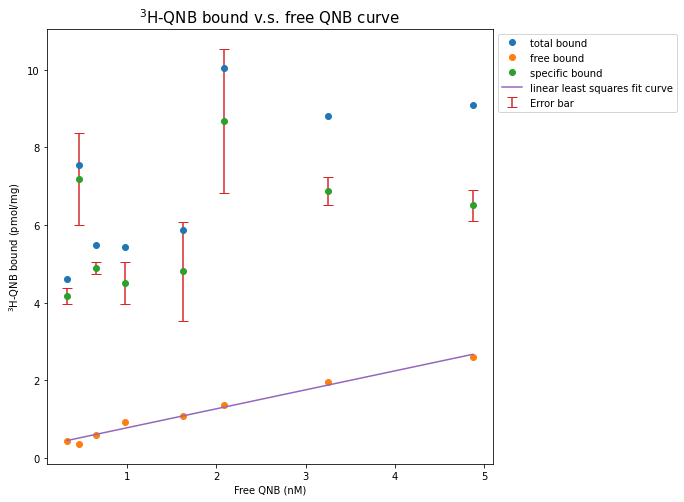

In [224]:
import matplotlib.pyplot as plt
%matplotlib inline

# define figure size
plt.figure(figsize=(8,8))


# plot all three types of bounds
label_list = ['total bound', 'free bound', 'specific bound']

list_count = 0
for y_list in [QNB_bound, with_atropine, specific_bound ]:
    QNB_bound_pair = [(QNB_amount[i], y_list[i]) for i in range(len(QNB_amount))]
    QNB_bound_pair.sort(key=lambda x: x[0]) # sort data points in the increasing order in x axis
    x_plot_list = [x[0] for x in QNB_bound_pair]
    y_plot_list = [x[1] for x in QNB_bound_pair]
    plt.plot(x_plot_list, y_plot_list, "o", label=label_list[list_count])
    list_count += 1

# plot error bars
QNB_bound_pair = [(QNB_amount[i], specific_bound[i], std_without[i]) for i in range(len(QNB_amount))]
QNB_bound_pair.sort(key=lambda x: x[0])
x_plot_list = [x[0] for x in QNB_bound_pair]
y_plot_list = [x[1] for x in QNB_bound_pair]
z_plot_list = [x[2] for x in QNB_bound_pair]
plt.errorbar(x_plot_list, y_plot_list, yerr=z_plot_list, ls='none', solid_capstyle='projecting', capsize=5, label="Error bar")

# plot the fitted linear model non-specific binding v.s. free ligand concentration
# because it's a line, plotting it only requires two points.
min_x = min(QNB_amount)
max_x = max(QNB_amount)
minmax_x = np.array([min_x, max_x])
plt.plot(minmax_x, fit.params['grad'].value * minmax_x + fit.params['intercept'].value, label="linear least squares fit curve")
plt.xlabel("Free QNB (nM)")
plt.ylabel("$^3$H-QNB bound (pmol/mg)")
plt.title("$^3$H-QNB bound v.s. free QNB curve", fontsize=15)
plt.legend(bbox_to_anchor=(1, 1))
#plt.savefig('QNBvsFree.eps', format='eps', bbox_inches='tight')
plt.show()

## 3.3 Scatchard Plot

> The following linear model is used to find $k_{D}$
>
> \\[ \frac{B}{F} = - \frac{B}{k_D} + \frac{B_{tot}}{k_D}  \\]
> 
> where $B$ is the specific bound, $F$ is the free ligand, and $B_{tot}$ is the total bound which is refered as a constant. Alternatively, this equation can be written as
>
> \\[ \frac{B}{F} = \text{Grad}\times B + \text{Intercept}  \\]
>
> After fitting this linear model, $k_D$ and $B_{tot}$ can be retrieved by 
>
> \\[ k_D = - \frac{1}{\text{Grad}}, \quad B_{tot} = \text{Intercept} \times k_D \\]
>
> In particular, the standard deviation of $k_D$ can be computed from the standard deviation of Grad
>
> \\[ \text{Std.} k_D = \frac{\text{Std. Grad}}{\text{Grad}^2}\\]
>
> where Std. Grad is available in fit report.

`kD = 2.4013260941316386`

`std. kD = 7.722194091870286`

`Btot = 21.37379699609663`

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 12
    # data points      = 8
    # variables        = 2
    chi-square         = 191.954596
    reduced chi-square = 31.9924326
    Akaike info crit   = 29.4225386
    Bayesian info crit = 29.5814217
[[Variables]]
    grad:      -0.41643657 +/- 1.33917839 (321.58%) (init = 0.004)
    intercept:  8.90083069 +/- 8.22032314 (92.35%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(grad, intercept) = -0.970
kD 2.4013260941316386
kD_std 7.722194091870286
Btot 21.37379699609663


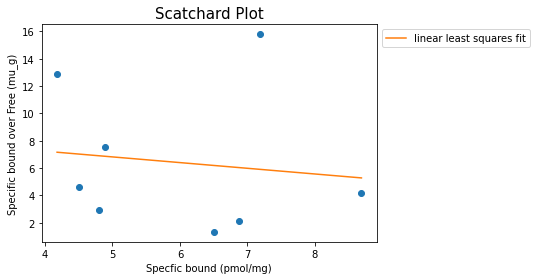

In [225]:

# get specific bound from total and free bounds
QNB_bound_total = QNB_bound # total bounds
QNB_bound_free = with_atropine # free bounds
QNB_bound_specific = QNB_bound_total - QNB_bound_free # specific bounds

Free_ligand = QNB_amount


scat_y = QNB_bound_specific/Free_ligand # y values to be fitted
scat_x = QNB_bound_specific # associated x values


sorted_x, sorted_y = zip(*sorted(zip(scat_x, scat_y))) # sort data points in the increasing order in x axis

plt.plot(sorted_x, sorted_y, 'o') # plot data points

model = lmfit.models.ExpressionModel("grad * x +intercept") # Defining equation to fit
params = model.make_params(grad=0.004, intercept =0) # Defining starting values

fit = model.fit(scat_y, params, x=scat_x) # fit model
grad_std = fit.params['grad'].stderr # get standard deviation of the gradient
grad = fit.params['grad'].value 
print(fit.fit_report())
kD = -1/fit.params['grad'].value # get kD from the gradient
kD_std = grad_std/(grad**2) # get standard deviation of kD from std. gradient 
intercept = fit.params['intercept'].value
Btot = intercept * kD

print('kD', kD)
print('kD_std', kD_std)
print('Btot', Btot)

# prepare Scatchard plotting

plt.plot(sorted_x, fit.params['grad'].value * np.array(sorted_x) + fit.params['intercept'].value, label= "linear least squares fit")
plt.xlabel("Specfic bound (pmol/mg)")
plt.ylabel("Specific bound over Free (mu_g)")
plt.title("Scatchard Plot", fontsize=15)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('ScatchardLinear.eps', format='eps', bbox_inches='tight')
plt.show()

## 3.4  Non-linear least squares fit

> Besides the linear model above, a alternative non-linear model can be used to find $k_D$.
>
>\\[ B = \frac{B_{tot} \cdot F }{k_D + F} \\]
>
> where $B$ is specific bounds, $B_{tot}$ is the total bounds, and $F$ is the free ligand
>
> The non-linear model may be sensitive to the initial starting point of parameters. In the model above, these parameters are $k_D$ and $B_{tot}$. To get a meaningful outcome, initial $k_D$ and $B_{tot}$ are obtained from the previous linear model.

`kD = 0.15134804142782343`

`std. kD = 0.15622385127655955`

`Btot = 6.918994291613273`

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


kD 0.15135013728179775
kD_std 0.15623642068910693
Btot 6.919005669892742
[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 26
    # data points      = 8
    # variables        = 2
    chi-square         = 14.4225706
    reduced chi-square = 2.40376177
    Akaike info crit   = 8.71482274
    Bayesian info crit = 8.87370582
[[Variables]]
    Btot:  6.91900567 +/- 1.05909720 (15.31%) (init = 21.3738)
    Kd:    0.15135014 +/- 0.15623642 (103.23%) (init = 2.401326)
[[Correlations]] (unreported correlations are < 0.100)
    C(Btot, Kd) = 0.802


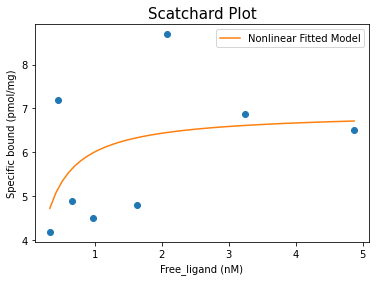

In [226]:
!pip install lmfit
import lmfit

# non-linear fit

nl_model = lmfit.models.ExpressionModel("(Btot * x)/(Kd + x)") # define nonlinear model

kD_linear = -1/fit.params['grad'].value # get starting kD from linear model fitted before
Btot_linear = fit.params['intercept'].value * kD_linear # get starting Btot from linear model fitted before
params = nl_model.make_params(Btot=Btot_linear, Kd=kD_linear)# Set starting values
nl_fit = nl_model.fit(QNB_bound_specific, params, x=Free_ligand) # fit nonlinear model

kD = nl_fit.params['Kd'].value
kD_std = nl_fit.params['Kd'].stderr
Btot = nl_fit.params['Btot'].value
print('kD', kD)
print('kD_std', kD_std)
print('Btot', Btot)

print(nl_fit.fit_report()) # print fit report

# plot
plt.plot(Free_ligand, QNB_bound_specific, 'o') # plot data points
x_list = np.linspace(min(Free_ligand), max(Free_ligand))
y_list = [nl_fit.eval(nl_fit.params, x=v) for v in x_list]
plt.plot(x_list, y_list, label='Nonlinear Fitted Model')
plt.xlabel("Free_ligand (nM)")
plt.ylabel("Specific bound (pmol/mg)")
plt.title("Scatchard Plot", fontsize=15)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('ScatchardNonLinear.eps', format='eps', bbox_inches='tight')
plt.show()